In [11]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [12]:
speclib_filepath = "../Output/D_002_SpecLib_Derivs.csv"

input_df = pd.read_csv(speclib_filepath)
input_df.head()

,ScanID,Area,Code_name,Species_name,Functional_group1,Functional_group2,Species_name_Freq,Functional_group1_Freq,Functional_group2_Freq,Genus,...,852.593_5nm,857.593_5nm,862.593_5nm,867.593_5nm,872.593_5nm,877.593_5nm,882.593_5nm,887.593_5nm,892.593_5nm,897.593_5nm
0,aleoch_Murph_061,Murphy,aleoch,Alectoria ochroleuca,Lichen,LightTerrestrialMacrolichen,6,465,122,Alectoria,...,0.253714,0.254478,0.255176,0.255714,0.256204,0.256744,0.257286,0.257767,0.258160,0.258481
1,aleoch_Murph_063,Murphy,aleoch,Alectoria ochroleuca,Lichen,LightTerrestrialMacrolichen,6,465,122,Alectoria,...,0.201025,0.201714,0.202366,0.202943,0.203526,0.204171,0.204810,0.205368,0.205809,0.206160
2,aleoch_Murph_064,Murphy,aleoch,Alectoria ochroleuca,Lichen,LightTerrestrialMacrolichen,6,465,122,Alectoria,...,0.317765,0.318003,0.318183,0.318076,0.317934,0.317952,0.317931,0.317696,0.317323,0.316932
3,aleoch_Murph_065,Murphy,aleoch,Alectoria ochroleuca,Lichen,LightTerrestrialMacrolichen,6,465,122,Alectoria,...,0.337911,0.338070,0.338184,0.338127,0.338018,0.337977,0.338016,0.338104,0.338143,0.338103
4,aleoch_Murph_066,Murphy,aleoch,Alectoria ochroleuca,Lichen,LightTerrestrialMacrolichen,6,465,122,Alectoria,...,0.288182,0.288323,0.288394,0.288381,0.288399,0.288523,0.288659,0.288687,0.288507,0.288137


In [13]:
input_df.describe()



,Species_name_Freq,Functional_group1_Freq,Functional_group2_Freq,Detectors,Battery.Voltage.1,Averages,Integration1,Integration2,Integration3,Latitude,...,852.593_5nm,857.593_5nm,862.593_5nm,867.593_5nm,872.593_5nm,877.593_5nm,882.593_5nm,887.593_5nm,892.593_5nm,897.593_5nm
count,1242.000000,1242.000000,1242.000000,959.0,959.000000,959.0,959.000000,959.000000,959.000000,880.000000,...,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000
mean,64.107890,374.078905,179.342190,256.0,7.266590,10.0,24.149114,20.077164,9.937435,64.657393,...,0.468960,0.469817,0.470616,0.471332,0.472073,0.472896,0.473650,0.474222,0.474700,0.475164
std,180.662822,268.929588,264.170597,0.0,0.384332,0.0,19.995659,10.489994,5.214826,1.727290,...,0.155499,0.155478,0.155438,0.155357,0.155258,0.155152,0.154998,0.154776,0.154541,0.154331
min,1.000000,12.000000,4.000000,256.0,6.540000,10.0,1.000000,1.000000,2.000000,61.151650,...,0.056940,0.057816,0.058709,0.059630,0.060547,0.061441,0.062360,0.063342,0.064347,0.065349
25%,11.000000,143.000000,68.000000,256.0,6.915000,10.0,15.000000,16.000000,8.000000,62.797377,...,0.382868,0.382855,0.383045,0.383842,0.385063,0.386801,0.388162,0.389896,0.390974,0.391887
50%,18.000000,366.000000,116.000000,256.0,7.240000,10.0,20.000000,16.000000,9.000000,64.950980,...,0.480958,0.480932,0.480954,0.481799,0.482149,0.482658,0.482906,0.483511,0.483952,0.483693
75%,44.000000,465.000000,139.000000,256.0,7.545000,10.0,20.000000,32.000000,10.000000,64.954740,...,0.562106,0.562649,0.564173,0.564708,0.565524,0.566165,0.567182,0.567102,0.567791,0.568679
max,930.000000,1006.000000,983.000000,256.0,8.080000,10.0,100.000000,50.000000,30.000000,69.223240,...,0.939878,0.941816,0.943457,0.944686,0.945720,0.946704,0.947419,0.947747,0.948040,0.948558


In [14]:
unique_groups = input_df["Functional_group1"].unique()
print(unique_groups)

['Lichen' 'ShrubDecid' 'Graminoid' 'Forb' 'Moss' 'Abiotic' 'TreeBroadleaf'
 'ShrubEvergreen' 'TreeConifer']


In [16]:
training_df, test_df = train_test_split(input_df, test_size=0.15)

In [28]:
def is_numeric(input_obj):
    is_number = False
    if(isinstance(input_obj, float)):
        is_number = True
    if(isinstance(input_obj, int)):
        is_number = True
    
    return is_number
        

In [29]:
def add_noise_to_vec(vec, variance = 0.05):
    noisy_vec = copy.deepcopy(vec).flatten()
    
    for idx in range(vec.size):
        if is_numeric(noisy_vec[idx]):
            noisy_vec[idx] = noisy_vec[idx] + np.random.normal(loc=0.0, scale= variance)

    return noisy_vec

## Ask for noise file from Charlie at Headwall


In [21]:
output_filename = "./trainingData.csv"

In [22]:
header = input_df.columns

In [17]:
def write_csv_line(file, arr):
    output_arr = arr.reshape((arr.size,))
    for idx in range(arr.size):
        if(idx == (arr.size - 1)):
            file.write(str(output_arr[idx]))
            file.write("\n")
        else:        
            file.write(str(output_arr[idx]))
            file.write(",")

In [82]:
def make_dataset_from_speclib(input_df, output_filename, unique_groups, num_per_class, noise_variance=0.05):
    with open(output_filename, "a+") as out_file:
        header_str = ",".join(input_df.columns)
        out_file.writelines([header_str])
        out_file.write("\n")
        for group in unique_groups:
            filtered_df = input_df[input_df["Functional_group1"] == group]
            for i in range(num_per_class):
                sample = filtered_df.sample(1, axis=0).to_numpy()
                noisy_sample = add_noise_to_vec(sample, variance=noise_variance)
                write_csv_line(out_file, noisy_sample)


            
            
            
            

In [91]:
make_dataset_from_speclib(
    input_df = training_df,
    output_filename=output_filename,
    unique_groups=unique_groups,
    num_per_class=500,
    noise_variance=0.01)

In [92]:
test_data_filename = "./validation.csv"

make_dataset_from_speclib(
    input_df=test_df,
    output_filename=test_data_filename,
    unique_groups=unique_groups,
    num_per_class=100,
    noise_variance=0.01
)


In [93]:
training_data = pd.read_csv(output_filename, header=0, low_memory=False)

In [94]:
training_data.describe()


,Species_name_Freq,Functional_group1_Freq,Functional_group2_Freq,Detectors,Battery.Voltage.1,Averages,Integration1,Integration2,Integration3,Latitude,...,852.593_5nm,857.593_5nm,862.593_5nm,867.593_5nm,872.593_5nm,877.593_5nm,882.593_5nm,887.593_5nm,892.593_5nm,897.593_5nm
count,4500.000000,4500.000000,4500.000000,3603.000000,3603.000000,3603.000000,3603.000000,3603.000000,3603.000000,3279.000000,...,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,60.036648,254.666826,151.390085,256.000022,7.324067,9.999814,22.833831,21.555947,9.447700,64.700742,...,0.465402,0.466254,0.466798,0.467658,0.468259,0.469118,0.469511,0.470249,0.470825,0.471455
std,184.160042,303.548761,272.553369,0.010022,0.393683,0.009981,16.267083,10.799195,3.678418,1.619459,...,0.147671,0.147765,0.147728,0.147668,0.147397,0.147420,0.147455,0.147461,0.146968,0.146871
min,0.974826,11.975138,3.976160,255.961082,6.560579,9.967627,0.980284,0.978646,1.977363,61.122485,...,0.054563,0.048134,0.048995,0.058948,0.052237,0.058860,0.060736,0.054482,0.051315,0.070231
25%,8.003423,57.993194,17.008042,255.993279,6.923660,9.992971,14.999799,15.995176,8.009200,62.811485,...,0.367987,0.369336,0.371164,0.370667,0.373363,0.375389,0.376046,0.379916,0.380704,0.382233
50%,16.980049,135.000106,53.005380,256.000079,7.365959,9.999704,19.990644,16.005271,9.000074,64.941328,...,0.488799,0.489081,0.490011,0.490227,0.491582,0.490986,0.491863,0.492366,0.492241,0.492330
75%,25.009446,366.007466,131.990435,256.006830,7.621620,10.006705,20.008805,31.992116,9.992541,64.967677,...,0.555119,0.556200,0.556023,0.557013,0.556059,0.558223,0.557248,0.557982,0.558830,0.558825
max,930.025781,1006.033347,983.033329,256.034694,8.082640,10.037360,100.023272,50.033067,30.027004,69.250831,...,0.924588,0.947060,0.933118,0.949016,0.949328,0.949619,0.956972,0.936616,0.937418,0.930692


In [95]:
rf_base = RandomForestClassifier(
    n_estimators=1000,
    min_samples_split=2,
    bootstrap=True,
    verbose=1,
)# trained on original data

rf_augmented = RandomForestClassifier(
    n_estimators=1000,
    min_samples_split=2,
    bootstrap=True,
    verbose=1,
) # new data

In [39]:
with open("./temp.txt", "w+") as f:
    f.write(str(training_df.columns.values))

In [96]:
rf_base.fit(
    training_df.drop(
        columns=[
            'ScanID','Area','Code_name','Species_name','Functional_group1',
 'Functional_group2','Species_name_Freq','Functional_group1_Freq',
 'Functional_group2_Freq','Genus','Version','File.Name.1','Instrument',
 'Detectors','Measurement','Date','Time','Battery.Voltage.1','Averages',
 'Integration1','Integration2','Integration3','Dark.Mode.1','Foreoptic',
 'Radiometric.Calibration.1','Units','Latitude','Longitude','Altitude',
 'GPS.Time.1','Satellites','Calibrated.Reference.Correction.File.1',
 'Channels','File.Name','Battery.Voltage','Dark.Mode',
 'Radiometric.Calibration','GPS.Time',
 'Calibrated.Reference.Correction.File'
            ]), 
    training_df["Functional_group1"])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    8.9s finished


RandomForestClassifier(n_estimators=1000, verbose=1)

In [97]:
dropped_cols = [
            'ScanID','Area','Code_name','Species_name','Functional_group1',
 'Functional_group2','Species_name_Freq','Functional_group1_Freq',
 'Functional_group2_Freq','Genus','Version','File.Name.1','Instrument',
 'Detectors','Measurement','Date','Time','Battery.Voltage.1','Averages',
 'Integration1','Integration2','Integration3','Dark.Mode.1','Foreoptic',
 'Radiometric.Calibration.1','Units','Latitude','Longitude','Altitude',
 'GPS.Time.1','Satellites','Calibrated.Reference.Correction.File.1',
 'Channels','File.Name','Battery.Voltage','Dark.Mode',
 'Radiometric.Calibration','GPS.Time',
 'Calibrated.Reference.Correction.File'
            ]

In [98]:
rf_augmented.fit(
    training_data.drop(
        columns=dropped_cols), 
    training_data["Functional_group1"])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   37.9s finished


RandomForestClassifier(n_estimators=1000, verbose=1)

In [99]:
base_test_pred = rf_base.predict(test_df.drop(columns=dropped_cols))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


In [100]:
base_accuracy = accuracy_score(test_df["Functional_group1"], base_test_pred)
base_f1 = f1_score(test_df["Functional_group1"], base_test_pred, average = 'weighted')

In [101]:
augmented_test_pred = rf_augmented.predict(test_df.drop(columns=dropped_cols))
augmented_accuracy = accuracy_score(test_df["Functional_group1"], augmented_test_pred)
augmented_f1 = f1_score(test_df["Functional_group1"], augmented_test_pred, average = 'weighted')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


In [102]:
print("--- Test results comparison ---")
print("Base Model (Class Imbalance):")
print(f"Accuracy: \t{base_accuracy}")
print(f"F1 Score: \t{base_f1}")
print("Augmented Model (Added noise, No Class Imbalance):")
print(f"Accuracy: \t{augmented_accuracy}")
print(f"F1 Score: \t{augmented_f1}")

--- Test results comparison ---
Base Model (Class Imbalance):
Accuracy: 	0.8074866310160428
F1 Score: 	0.8011627810438554
Augmented Model (Added noise, No Class Imbalance):
Accuracy: 	0.8288770053475936
F1 Score: 	0.8265283365715491


In [103]:
print("--- Test results comparison ---")
print("Base Model (Class Imbalance):")
print(f"Accuracy: \t{base_accuracy}")
print(f"F1 Score: \t{base_f1}")
print("Augmented Model (Added noise, No Class Imbalance):")
print(f"Accuracy: \t{augmented_accuracy}")
print(f"F1 Score: \t{augmented_f1}")

--- Test results comparison ---
Base Model (Class Imbalance):
Accuracy: 	0.8074866310160428
F1 Score: 	0.8011627810438554
Augmented Model (Added noise, No Class Imbalance):
Accuracy: 	0.8288770053475936
F1 Score: 	0.8265283365715491


## To Do
Smoothing of target data
Heterogenious 
Normalization or standardization
Optimization of number of classes; should be homogeneous

Rigorous statistical analysis to establish clusters
* Euclidean distance in spectral is problematic; must be on the same scale: Normalization to [0,1]? z-scores?
* Clustering
* More scan data is good
* Difference between spectra on ground and drone (DEMs to correct reflectance)
* Partial Least Squares Descriminant Analysis: non-orthogonal PCA; finds axes of variation (like factor analysis for classification)
* consider wide range of options

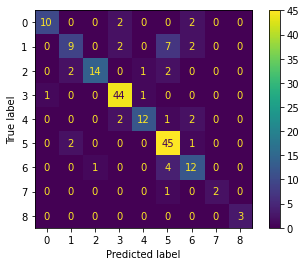

In [105]:
base_confusion = confusion_matrix(test_df["Functional_group1"], base_test_pred)
base_cm = ConfusionMatrixDisplay(base_confusion)

base_cm.plot()
plt.show()

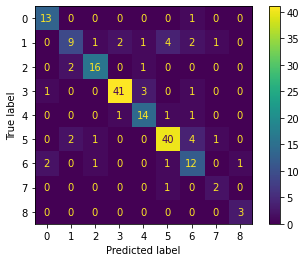

In [80]:
augmented_confusion = confusion_matrix(test_df["Functional_group1"], augmented_test_pred)
augmented_cm = ConfusionMatrixDisplay(augmented_confusion)

augmented_cm.plot()
plt.show()

In [63]:
base_filename = "./base_rf_1.pkl"
augmented_filename = "./class_corrected_noised_rf_1.pkl"

with open(base_filename, 'wb') as base_file:
    pickle.dump(rf_base, base_file)
    
with open(augmented_filename, 'wb') as aug_file:
    pickle.dump(rf_augmented, aug_file)

## Learnings

Trees perhaps should be split

water status makes a big difference, same with phenotype variation
Photograph on the ground, find exact spot on ground and 


## File transfers
cyberduck
fileZilla

use MD5 sums